In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isnull().sum().sum()

0

In [5]:
X = df
y = pd.Series(cancer.target)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter= 2500, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=2500, random_state=42)

In [8]:
y_pred = log_reg_model.predict(X_test)
y_true = y_test

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

print("Accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred,
                                                               average='binary')
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("F-Score:", np.round(fscore, 2))

Accuracy: 0.93
Precision: 0.94
Recall: 0.94
F-Score: 0.94


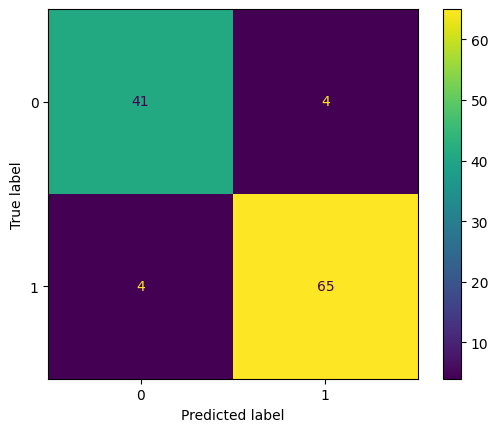

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [24]:
from tensorflow import keras 

inputs = keras.Input(X_train.shape[1])
outputs = keras.layers.Dense(1, activation=keras.activations.sigmoid)(inputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [25]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, shuffle=False)

Epoch 1/50
12/12 [==============================] - 1s 23ms/step - loss: 68.6799 - binary_accuracy: 0.5907 - val_loss: 13.5642 - val_binary_accuracy: 0.2418
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 25.7675 - binary_accuracy: 0.3407 - val_loss: 18.2283 - val_binary_accuracy: 0.3407
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 13.0520 - binary_accuracy: 0.3489 - val_loss: 7.9734 - val_binary_accuracy: 0.3626
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 9.3379 - binary_accuracy: 0.2500 - val_loss: 6.0149 - val_binary_accuracy: 0.5275
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 7.5047 - binary_accuracy: 0.3846 - val_loss: 4.9969 - val_binary_accuracy: 0.3407
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 4.3554 - binary_accuracy: 0.4753 - val_loss: 3.1975 - val_binary_accuracy: 0.5714
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss

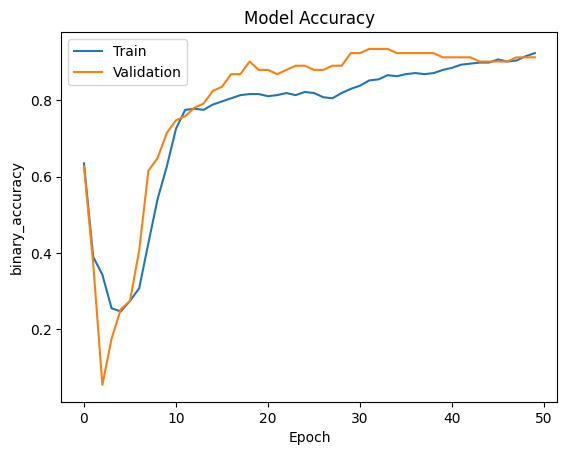

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'], label='Train')
plt.plot(history.history['val_binary_accuracy'], label='Validation')
plt.ylabel('binary_accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

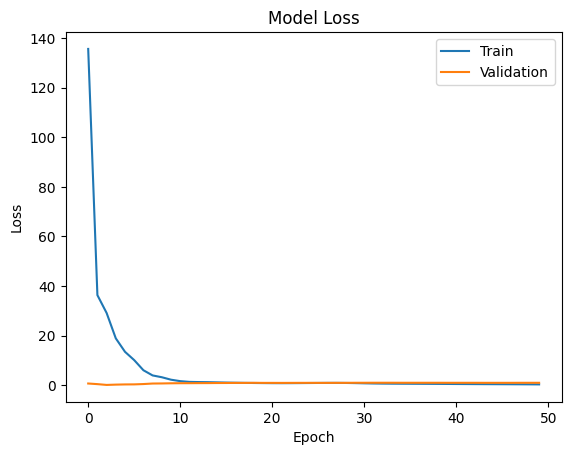

In [21]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_binary_accuracy'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')